<a href="https://colab.research.google.com/github/Thorfast191/Alien-Invansion/blob/main/Sentiment_Analysis_Multi_Dimensional_Emotion_Mapping_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dependencies

In [1]:
!pip install datasets transformers datasets tensorflow numpy scikit-learn spacy


In [2]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 51.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


# **Loading the Dataset**
[Dataset Link](https://huggingface.co/datasets/google-research-datasets/go_emotions/tree/main)

In [3]:
from datasets import load_dataset

go_emo = load_dataset("go_emotions", "simplified",
                          split={
                              'train': 'train[:800]',
                              'validation': 'validation[:100]',
                              'test': 'test[:100]'
                          })
print(go_emo)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


DatasetDict({
    train: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 800
    })
    validation: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 100
    })
    test: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 100
    })
})


# **Data Analysis**

In [4]:
df_train = go_emo["train"].to_pandas()
df_test = go_emo["test"].to_pandas()
df_val = go_emo["validation"].to_pandas()

print(df_train.head())
print(df_test.head())
print(df_val.head())

                                                text labels       id
0  My favourite food is anything I didn't have to...   [27]  eebbqej
1  Now if he does off himself, everyone will thin...   [27]  ed00q6i
2                     WHY THE FUCK IS BAYLESS ISOING    [2]  eezlygj
3                        To make her feel threatened   [14]  ed7ypvh
4                             Dirty Southern Wankers    [3]  ed0bdzj
                                                text labels       id
0  I’m really sorry about your situation :( Altho...   [25]  eecwqtt
1    It's wonderful because it's awful. At not with.    [0]  ed5f85d
2  Kings fan here, good luck to you guys! Will be...   [13]  een27c3
3  I didn't know that, thank you for teaching me ...   [15]  eelgwd1
4  They got bored from haunting earth for thousan...   [27]  eem5uti
                                                text   labels       id
0  Is this in New Orleans?? I really feel like th...     [27]  edgurhb
1  You know the answer man, yo

# Splitting Dataset

In [5]:
# from sklearn.model_selection import train_test_split
# import pandas as pd

# # Combine all data into a single DataFrame for splitting
# all_data = pd.concat([df_train, df_val, df_test], ignore_index=True)

# # Split the combined data into 80% training, 10% validation, and 10% test
# train_df, temp_df = train_test_split(all_data, test_size=0.2, random_state=42)
# val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)


# Check Missing value

In [6]:
# Check missing values in the train split
print("Train Split Missing Values:")
print(df_train.isnull().sum())

# Check missing values in the test split
print("\nTest Split Missing Values:")
print(df_test.isnull().sum())

# Check missing values in the validation split
print("\nValidation Split Missing Values:")
print(df_val.isnull().sum())

Train Split Missing Values:
text      0
labels    0
id        0
dtype: int64

Test Split Missing Values:
text      0
labels    0
id        0
dtype: int64

Validation Split Missing Values:
text      0
labels    0
id        0
dtype: int64


# **Cleaning Data**

In [7]:
#Drop the 'id' column
df_train.drop(columns=["id"], inplace=True)
df_test.drop(columns=["id"], inplace=True)
df_val.drop(columns=["id"], inplace=True)

print("Train Split:")
print(df_train.head())
print("Test Split:")
print(df_test.head())
print("Validation Split:")
print(df_val.head())

Train Split:
                                                text labels
0  My favourite food is anything I didn't have to...   [27]
1  Now if he does off himself, everyone will thin...   [27]
2                     WHY THE FUCK IS BAYLESS ISOING    [2]
3                        To make her feel threatened   [14]
4                             Dirty Southern Wankers    [3]
Test Split:
                                                text labels
0  I’m really sorry about your situation :( Altho...   [25]
1    It's wonderful because it's awful. At not with.    [0]
2  Kings fan here, good luck to you guys! Will be...   [13]
3  I didn't know that, thank you for teaching me ...   [15]
4  They got bored from haunting earth for thousan...   [27]
Validation Split:
                                                text   labels
0  Is this in New Orleans?? I really feel like th...     [27]
1  You know the answer man, you are programmed to...  [4, 27]
2               I've never been this sad in my life

# **Map Label Indices to Emotion Names**

In [8]:
# Get the emotion labels
emotion_labels = go_emo["train"].features["labels"].feature.names

# Function to map label indices to emotion names
def map_labels_to_emotions(label_indices):
    return [emotion_labels[idx] for idx in label_indices]

# Apply the mapping to each DataFrame
df_train["emotions"] = df_train["labels"].apply(map_labels_to_emotions)
df_val["emotions"] = df_val["labels"].apply(map_labels_to_emotions)
df_test["emotions"] = df_test["labels"].apply(map_labels_to_emotions)

print("Training Split:")
print(df_train.head())
print("Testing Split:")
print(df_test.head())
print("Validation Split:")
print(df_val.head())

Training Split:
                                                text labels     emotions
0  My favourite food is anything I didn't have to...   [27]    [neutral]
1  Now if he does off himself, everyone will thin...   [27]    [neutral]
2                     WHY THE FUCK IS BAYLESS ISOING    [2]      [anger]
3                        To make her feel threatened   [14]       [fear]
4                             Dirty Southern Wankers    [3]  [annoyance]
Testing Split:
                                                text labels      emotions
0  I’m really sorry about your situation :( Altho...   [25]     [sadness]
1    It's wonderful because it's awful. At not with.    [0]  [admiration]
2  Kings fan here, good luck to you guys! Will be...   [13]  [excitement]
3  I didn't know that, thank you for teaching me ...   [15]   [gratitude]
4  They got bored from haunting earth for thousan...   [27]     [neutral]
Validation Split:
                                                text   labels  \
0  I

# **Frequency of each emotion in the dataset**

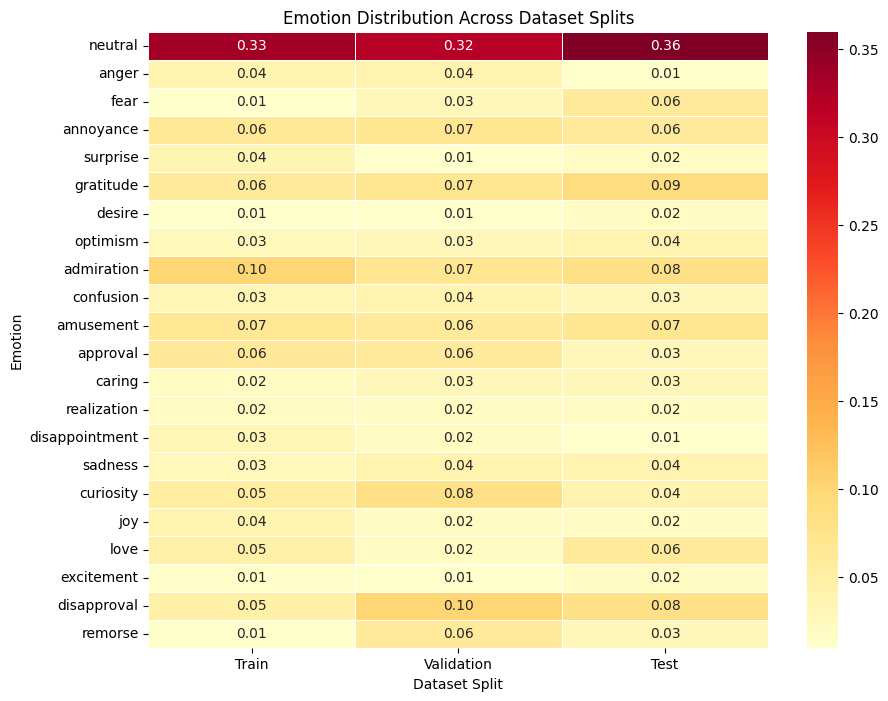

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Count the frequency of each emotion in each split
def count_emotions(df):
    emotion_counts = {}
    for emotions in df["emotions"]:
        for emotion in emotions:
            if emotion in emotion_counts:
                emotion_counts[emotion] += 1
            else:
                emotion_counts[emotion] = 1
    return emotion_counts

# Get emotion counts for each split
train_counts = count_emotions(df_train)
val_counts = count_emotions(df_val)
test_counts = count_emotions(df_test)

# Convert counts to DataFrames
train_counts_df = pd.DataFrame(list(train_counts.items()), columns=["Emotion", "Train"])
val_counts_df = pd.DataFrame(list(val_counts.items()), columns=["Emotion", "Validation"])
test_counts_df = pd.DataFrame(list(test_counts.items()), columns=["Emotion", "Test"])

# Merge the counts into a single DataFrame
counts_df = train_counts_df.merge(val_counts_df, on="Emotion").merge(test_counts_df, on="Emotion")
counts_df.set_index("Emotion", inplace=True)

# Normalize the counts
counts_df["Train"] = counts_df["Train"] / len(df_train)
counts_df["Validation"] = counts_df["Validation"] / len(df_val)
counts_df["Test"] = counts_df["Test"] / len(df_test)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(counts_df, annot=True, fmt=".2f", cmap="YlOrRd", linewidths=0.5)
plt.title("Emotion Distribution Across Dataset Splits")
plt.xlabel("Dataset Split")
plt.ylabel("Emotion")
plt.show()

# Feature Engineering

**Lowercasing Data**

In [10]:
# df_train["text"] = df_train["text"].str.lower()
# df_val["text"] = df_val["text"].str.lower()
# df_test["text"] = df_test["text"].str.lower()

# df_train.head()
# df_test.head()
# df_val.head()

**Remove Punctuation and Special Characters**

In [11]:
# import re

# def remove_punctuation(text):
#     return re.sub(r"[^\w\s]", "", text)

# df_train["text"] = df_train["text"].apply(remove_punctuation)
# df_val["text"] = df_val["text"].apply(remove_punctuation)
# df_test["text"] = df_test["text"].apply(remove_punctuation)

# df_train.head()
# df_test.head()
# df_val.head()

**Remove Stopwords**

In [12]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words("english"))

def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in stop_words])

df_train["text"] = df_train["text"].apply(remove_stopwords)
df_val["text"] = df_val["text"].apply(remove_stopwords)
df_test["text"] = df_test["text"].apply(remove_stopwords)

df_train.head()
df_test.head()
df_val.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,labels,emotions
0,Is New Orleans?? I really feel like New Orleans.,[27],[neutral]
1,"You know answer man, programmed capture codes ...","[4, 27]","[approval, neutral]"
2,I've never sad life!,[25],[sadness]
3,The economy heavily controlled subsidized gove...,"[4, 27]","[approval, neutral]"
4,He could easily taken real camera legitimate s...,[20],[optimism]


**Intensifier Handling**

In [13]:
# ========== INTENSIFIER HANDLING ==========
import spacy
nlp = spacy.load("en_core_web_sm")

# Preserve intensifiers in text
INTENSIFIERS = {'very', 'extremely', 'absolutely', 'highly',
               'completely', 'totally', 'utterly', 'somewhat',
               'slightly', 'barely', 'quite', 'really'}

# Modify stopwords removal
stop_words = set(stopwords.words("english")) - INTENSIFIERS

# Add intensity metadata
def extract_intensity_features(text):
    doc = nlp(text)
    features = {
        'num_intensifiers': 0,
        'max_intensity': 1.0,
        'weighted_intensity': 1.0
    }

    for token in doc:
        if token.text.lower() in INTENSIFIERS:
            features['num_intensifiers'] += 1
            intensity = 1.5 if token.text.lower() == 'very' else 1.3  # Example weights
            features['max_intensity'] = max(features['max_intensity'], intensity)
            features['weighted_intensity'] *= intensity

    return features

# Apply to all datasets
for df in [df_train, df_val, df_test]:
    intensity_features = df["text"].apply(extract_intensity_features).apply(pd.Series)
    df[["num_intensifiers", "max_intensity", "weighted_intensity"]] = intensity_features

**Emotion Mapping**

In [14]:
# Get emotion labels
emotion_labels = go_emo["train"].features["labels"].feature.names

# Define the emotion-to-category mapping (all 28 emotions covered)
emotion_to_category = {
    # Positive (11)
    "admiration": "positive",
    "amusement": "positive",
    "approval": "positive",
    "caring": "positive",
    "desire": "positive",
    "excitement": "positive",
    "gratitude": "positive",
    "joy": "positive",
    "love": "positive",
    "optimism": "positive",
    "pride": "positive",

    # Negative (11)
    "anger": "negative",
    "annoyance": "negative",
    "disappointment": "negative",
    "disapproval": "negative",
    "disgust": "negative",
    "embarrassment": "negative",
    "fear": "negative",
    "grief": "negative",
    "nervousness": "negative",
    "remorse": "negative",
    "sadness": "negative",

    # Neutral (6)
    "confusion": "neutral",
    "curiosity": "neutral",
    "neutral": "neutral",
    "realization": "neutral",
    "relief": "neutral",
    "surprise": "neutral"
}

def get_category(labels):
    categories = [emotion_to_category[emotion_labels[label]] for label in labels]
    return max(set(categories), key=categories.count)  # Pick dominant category

# Create 'category' column
df_train["category"] = df_train["labels"].apply(get_category)
df_val["category"] = df_val["labels"].apply(get_category)
df_test["category"] = df_test["labels"].apply(get_category)

positive_emotions = ["joy", "admiration", "excitement", "love", "gratitude", "optimism", "caring", "approval", "desire", "pride"]
negative_emotions = ["anger", "sadness", "disgust", "fear", "annoyance", "disapproval", "remorse", "embarrassment", "grief"]

def calculate_scores(labels):
    positive = sum(1 for label in labels if emotion_labels[label] in positive_emotions)
    negative = sum(1 for label in labels if emotion_labels[label] in negative_emotions)
    return positive, negative

df_train[["positive_score", "negative_score"]] = df_train["labels"].apply(
    lambda x: pd.Series(calculate_scores(x)))
df_val[["positive_score", "negative_score"]] = df_val["labels"].apply(
    lambda x: pd.Series(calculate_scores(x)))
df_test[["positive_score", "negative_score"]] = df_test["labels"].apply(
    lambda x: pd.Series(calculate_scores(x)))

**Tokenization**

In [15]:
# STEP 4: Tokenization
from transformers import BertTokenizer
import tensorflow as tf

MODEL_NAME = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)


def prepare_inputs(text, df):
    # Tokenize text with TensorFlow tensors
    tokenized = tokenizer(
        text.tolist(),
        padding="max_length",
        truncation=True,
        max_length=512,
        return_tensors="tf"
    )

    # Convert intensity features to TensorFlow tensor
    intensity_features = tf.convert_to_tensor(
        df.loc[text.index, ["num_intensifiers", "max_intensity", "weighted_intensity"]].values,
        dtype=tf.float32
    )

    return {
        "input_ids": tokenized["input_ids"],
        "attention_mask": tokenized["attention_mask"],
        "intensity_features": intensity_features
    }

# Process datasets
tokenized_train = prepare_inputs(df_train["text"], df_train)
tokenized_val = prepare_inputs(df_val["text"], df_val)
tokenized_test = prepare_inputs(df_test["text"], df_test)

# Model Architecture

**Model Architecture**

In [16]:
from transformers import TFBertForSequenceClassification
import tensorflow as tf

class EnhancedEmotionModel(tf.keras.Model):
    def __init__(self, num_emotions=28):
        super().__init__()
        # Base BERT model for multi-label classification
        self.bert = TFBertForSequenceClassification.from_pretrained(
            "bert-base-uncased",
            num_labels=num_emotions,
            problem_type="multi_label_classification"
        )
        # Intensity regression heads
        self.intensity_regressors = tf.keras.layers.Dense(
            2,
            activation='sigmoid',  # For intensity scores (0-1)
            name='intensity_output'
        )

    def call(self, inputs):
        # BERT outputs for emotion presence
        outputs = self.bert(
            input_ids=inputs["input_ids"],
            attention_mask=inputs["attention_mask"]
        )

        # Separate intensity prediction
        intensity = self.intensity_regressors(outputs.logits)

        return {
            "emotions": outputs.logits,  # For presence/absence
            "intensity": intensity       # For intensity scores
        }

model = EnhancedEmotionModel()


model.safetensors:  52%|#####2    | 231M/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


**Prepare Training Data**

In [17]:
train_dataset = tf.data.Dataset.from_tensor_slices((
    {
        "input_ids": tokenized_train["input_ids"],
        "attention_mask": tokenized_train["attention_mask"],
        "intensity_features": tokenized_train["intensity_features"]
    },
    {
        "emotions": df_train["category"].map({"positive": 0, "negative": 1, "neutral": 2}).values,
        "intensity": df_train[["positive_score", "negative_score"]].values
    }
)).batch(8).prefetch(tf.data.AUTOTUNE)

val_dataset = tf.data.Dataset.from_tensor_slices((
    {
        "input_ids": tokenized_val["input_ids"],
        "attention_mask": tokenized_val["attention_mask"],
        "intensity_features": tokenized_val["intensity_features"]
    },
    {
        "emotions": df_val["category"].map({"positive": 0, "negative": 1, "neutral": 2}).values,
        "intensity": df_val[["positive_score", "negative_score"]].values
    }
)).batch(8).prefetch(tf.data.AUTOTUNE)

**Compile the Model**

In [18]:
# ========== INTENSITY-AWARE LOSS ==========
class IntensityAwareMSE(tf.keras.losses.Loss):
    def __init__(self, intensity_weight=0.3):
        super().__init__()
        self.base_loss = tf.keras.losses.MeanSquaredError()
        self.intensity_weight = intensity_weight

    def call(self, y_true, y_pred):
        base_loss = self.base_loss(y_true, y_pred)
        # Add custom logic using intensity features here
        return base_loss * (1 + self.intensity_weight)

# Update model compilation
model.compile(
    optimizer=tf.keras.optimizers.Adam(2e-5),
    loss={
        "emotions": tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        "intensity": IntensityAwareMSE()
    },
    metrics={
        "emotions": ["accuracy"],
        "intensity": ["mse"]
    }
)

**Train the Model**

In [ ]:
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10
)

Epoch 1/10


**Save The Model**

In [ ]:
from google.colab import drive
from tensorflow.keras.models import load_model

drive.mount('/content/drive')

# model.save("/content/drive/MyDrive/models/sentiment_emotion_mapping_1.hdf5")
model.save("/content/drive/MyDrive/models/sentiment_emotion_mapping_3", save_format="tf")


### Prediction

In [ ]:
import re
import tensorflow as tf
import pandas as pd

# def prepare_inputs(text, df):
#     # Lowercase and remove punctuation from text
#     text = text.str.lower().apply(lambda t: re.sub(r"[^\w\s]", "", t))
#     # Tokenize the text
#     inputs = tokenizer(
#         text.tolist(),
#         padding="max_length",
#         truncation=True,
#         max_length=512,
#         return_tensors="tf"
#     )
#     # Assuming your dataframe already has precomputed intensity features,
#     # here we simulate them. If not, compute or add your intensity features column.
#     if "intensity_features" not in df.columns:
#         # Example: create dummy intensity features (adjust as needed)
#         df["intensity_features"] = [[1.0, 1.0, 1.0]] * len(df)
#     intensity_features = tf.convert_to_tensor(
#         list(df["intensity_features"]),
#         dtype=tf.float32
#     )
#     # Return inputs with intensity features added
#     inputs["intensity_features"] = intensity_features
#     return inputs

# # Recreate the model architecture
# model = EnhancedEmotionModel()

# # Option 1: Build the model by calling it on a sample input (if needed)
# # For example, create a dummy batch matching your input shape
# dummy_inputs = {
#     "input_ids": tf.zeros((1, 512), dtype=tf.int32),
#     "attention_mask": tf.zeros((1, 512), dtype=tf.int32),
#     "intensity_features": tf.zeros((1, 3), dtype=tf.float32)
# }
# _ = model(dummy_inputs)  # This will build the model


# Load the weights from your HDF5 file
model.load_weights("/content/drive/MyDrive/models/sentiment_emotion_mapping_3")

# Prepare your test data (assuming prepare_inputs and df_test are defined)
tokenized_test = prepare_inputs(df_test["text"], df_test)
test_dataset = tf.data.Dataset.from_tensor_slices({
    "input_ids": tokenized_test["input_ids"],
    "attention_mask": tokenized_test["attention_mask"],
    "intensity_features": tokenized_test["intensity_features"]
}).batch(8)

# Make predictions
predictions = model.predict(test_dataset)

# Extract the outputs (assuming model outputs a dict with 'logits' and 'regressor')
class_logits = predictions["emotions"]
regression_preds = predictions["intensity"]

# Get class labels from logits
predicted_classes = tf.argmax(class_logits, axis=1).numpy()

print(predicted_classes)



# Define the reverse mapping from index to label
label_mapping = {0: "positive", 1: "negative", 2: "neutral"}

# Create a DataFrame with test text and predicted label
results_df = pd.DataFrame({
    "Test Text": df_test["text"].tolist(),
    "Predicted Label": [label_mapping[pred] for pred in predicted_classes]
})

# Print the results
print(results_df)

# **Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create a mapping (adjust if your mapping is different)
label_mapping = {"positive": 0, "negative": 1, "neutral": 2}

# Map the actual labels in df_test to their corresponding indices
actual_labels = df_test["category"].map(label_mapping).values

# Assuming predicted_classes contains your model predictions (as integers)
accuracy = accuracy_score(actual_labels, predicted_classes)
print("Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(actual_labels, predicted_classes, target_names=["positive", "negative", "neutral"]))

print("\nConfusion Matrix:")
print(confusion_matrix(actual_labels, predicted_classes))
